In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(n_samples, x_scale=[0,1], noise=0.5):
    '''Generate univariate regression dataset'''
    x = np.sort(np.random.rand(n_samples))
    y = 6*(-1/6 + x + (x > 1/3)*(2/3-2*x) + (x > 2/3)*(2*x-4/3)) + noise*np.random.randn(n_samples)
    x = x_scale[0] + (x_scale[1]-x_scale[0])*x
    X = x.reshape(-1,1)
    return X, y

def plot_data(X, y):
    '''Plot univariate regression dataset'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    return

def plot_prediction(model, X, y, n_points=100):
    '''Plot dataset and predictions for a univariate regression model'''
    plot_data(X,y)
    if n_points is not None:
        xx = np.linspace(X.min(),X.max(),n_points)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    y_pred = model.predict(X)
    plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

(30, 1) (30,)
(1000, 1) (1000,)
(1000, 1) (1000,)


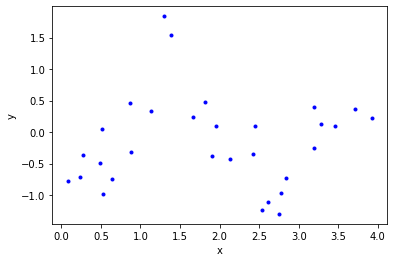

In [125]:
np.random.seed(2019*2)
X, y = gen_data(n_samples=30, x_scale=[0,4])
X_val, y_val = gen_data(n_samples=1000, x_scale=[0,4])
X_test, y_test = gen_data(n_samples=1000, x_scale=[0,4])

print(X.shape, y.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Plot only the training data!
plot_data(X,y)

### Teste usando LinearRegression

In [126]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_train_pred = model.predict(X)
y_train_pred

array([-0.20001138, -0.19633476, -0.19544461, -0.19060519, -0.18996726,
       -0.18952346, -0.18695564, -0.18160801, -0.1814653 , -0.17543459,
       -0.17175762, -0.16941692, -0.16298842, -0.1594301 , -0.15747494,
       -0.15629353, -0.15212056, -0.14546805, -0.14492571, -0.14287046,
       -0.14093095, -0.13780927, -0.13719661, -0.1355976 , -0.12731828,
       -0.12731169, -0.12525231, -0.12110126, -0.11525863, -0.11029896])

### Teste usando Ridge

In [128]:
from sklearn.linear_model import Ridge
lamb = 0
ridge = Ridge(alpha = lamb)

In [129]:
ridge.fit(X,y)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [130]:
a = ridge.predict(X)

In [131]:
a

array([-0.20001138, -0.19633476, -0.19544461, -0.19060519, -0.18996726,
       -0.18952346, -0.18695564, -0.18160801, -0.1814653 , -0.17543459,
       -0.17175762, -0.16941692, -0.16298842, -0.1594301 , -0.15747494,
       -0.15629353, -0.15212056, -0.14546805, -0.14492571, -0.14287046,
       -0.14093095, -0.13780927, -0.13719661, -0.1355976 , -0.12731828,
       -0.12731169, -0.12525231, -0.12110126, -0.11525863, -0.11029896])

### Classe de treinamento

In [132]:
# Add column of ones
X_new = np.c_[np.ones(X.shape[0]), X]
X_new.shape

(30, 2)

In [133]:
X = X_new
L = np.identity(X.shape[1]) #numero de colunas de X = [30,2]
L[0][0] = 0

lamb = 0
m = len(y)

#self.hessian =  * (np.linalg.inv(X.T @ X) @ (X.T @ y)) 
assert np.linalg.matrix_rank(X.T @ X + lamb*L) == X.shape[1], 'Singular matrix'
#w =  np.linalg.inv(X.T @ X) @ (X.T @ y)
w = np.linalg.inv(X.T @ X + lamb*L) @ (X.T @ y)

In [134]:
w

array([-0.20189161,  0.02333163])

In [135]:
def predict(X, w):
    # Compute prediction
    y_hat = X @ w
    return y_hat

In [136]:
yy = predict(X_new,w)

In [137]:
yy

array([-0.20001138, -0.19633476, -0.19544461, -0.19060519, -0.18996726,
       -0.18952346, -0.18695564, -0.18160801, -0.1814653 , -0.17543459,
       -0.17175762, -0.16941692, -0.16298842, -0.1594301 , -0.15747494,
       -0.15629353, -0.15212056, -0.14546805, -0.14492571, -0.14287046,
       -0.14093095, -0.13780927, -0.13719661, -0.1355976 , -0.12731828,
       -0.12731169, -0.12525231, -0.12110126, -0.11525863, -0.11029896])

In [142]:
def _fit_gd(X, y, w,  maxiter=1000, tol=1e-5, lr=1e-2):
    # Fit by gradient descent
    J_history = []
    L = np.identity(X.shape[1]) #numero de colunas de X = [30,2]
    L[0][0] = 0
    m = len(y)

    for c in range(maxiter):
        
        #gd = (2/m)* (X.T @ X) @ (X.T @ y) + lamb*(2/m) * L @ w
        
        #regularizando todo o vetor, aula 3  pag 27
        gd = (1 - lamb*lr*(2/m))*w -   ( lr*(2/m) * (X_new.T @ (predict(X_new,w) - y)) )

        w = w - lr*gd

        #cost = ( (1/m)* np.linalg.norm(((predict(X_new,w) - y)**2)) ) + (lamb*(1/m)* (w.T @ (L @ w)) )
        cost = ( (1/m)* np.linalg.norm(((predict(X_new,w) - y)**2)) ) + (lamb*(1/m)* np.linalg.norm(w))

        J_history.append(cost)
        
        if np.linalg.norm(w) < tol:
         #enc = 'sim'
         break

    return w, J_history

In [143]:
new_w, hist = _fit_gd(X_new,y,w) #X_new = bias + X

In [144]:
new_w

array([0.00344186, 0.00610834])

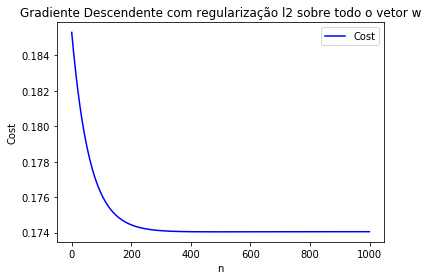

In [145]:
values = np.arange(1000)
plt.plot(values,hist,'b')

plt.title('Gradiente Descendente com regularização l2 sobre todo o vetor w')
plt.legend(['Cost'])
plt.xlabel('n')
plt.ylabel('Cost')
plt.tight_layout()